# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [2]:
# symbol time (length of signal)
t_symb = 1.0

# sample frequency and frequency regime
f_s = 1e2
N_f = 512
f = np.arange( -f_s/2, f_s/2, f_s/N_f )

# define spectrum of pulse shape in the frequency regime as modulated sinc 
X = t_symb * np.sinc( t_symb * f ) * np.exp( -1j * 2 * np.pi * f * t_symb )
X[ np.isnan( X ) ] = t_symb


# Flat fading

In [3]:
# delay of paths
tau = [ 0.0, 0.025 ]

# get frequency response of the channel
H = np.zeros_like( f , dtype = complex )    
for ind_tau, val_tau in enumerate( tau ):
    H += np.exp( - 1j * 2 * np.pi * f * val_tau )

# get output frequency response
Y = H * X

# get according signals in time domain
x = np.fft.ifft( np.fft.fftshift( X ) )
y = np.fft.ifft( np.fft.fftshift( Y ) )

# Plotting

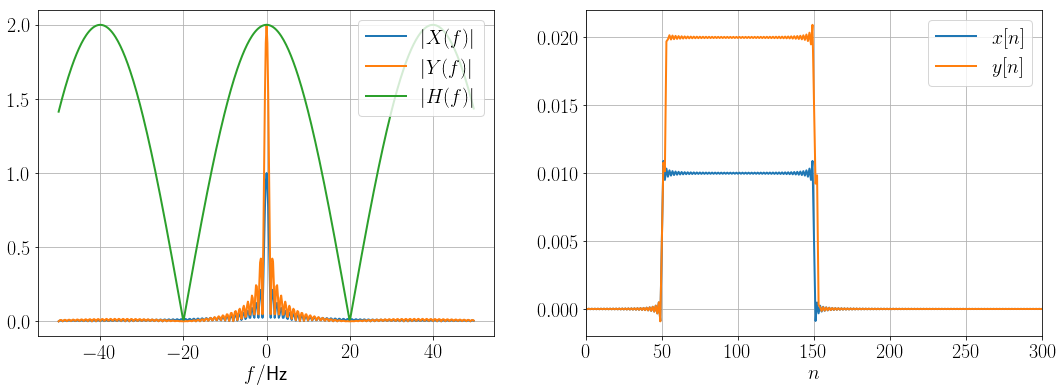

In [4]:
# plotting results
plt.subplot( 121 )
plt.plot( f, np.abs( X ), linewidth = 2.0, label='$|X(f)|$' )
plt.plot( f, np.abs( Y ), linewidth = 2.0, label='$|Y(f)|$' )
plt.plot( f, np.abs( H ), linewidth = 2.0, label='$|H(f)|$' )

plt.xlabel('$f/$Hz')
plt.grid( True )    
plt.legend( loc = 'upper right' )

plt.subplot( 122 )
plt.plot( np.real( x ), linewidth = 2.0, label='$x[n]$' )    
plt.plot( np.real( y ), linewidth = 2.0, label='$y[n]$' )

plt.xlim( (0, 300) )
plt.xlabel( '$n$' )
plt.grid( True )
plt.legend( loc = 'upper right' )

# Frequency-selective fading

In [5]:
# activate for example as in the lecture
if 1:
    # channel freq. selective as on slides
    tau = [ 0.0, .5]

# activate for multiple echos sampled randomly
if 1:
    # channel flat w. multiple echos
    N_tau = 11
    tau_max = .5
    
    tau = np.sort( tau_max * np.random.rand( N_tau )  )
    tau[ 0 ] = 0.0
    tau[ N_tau - 1 ] = tau_max

# get frequency response of the channel
H = np.zeros_like( f, dtype = complex )    
for ind_tau, val_tau in enumerate( tau ):
    H += np.exp( - 1j * 2 * np.pi * f * val_tau )

# get output frequency response
Y = H * X

# get according signals in time domain
x = np.fft.ifft( np.fft.fftshift( X ) )
y = np.fft.ifft( np.fft.fftshift( Y ) )

# Plotting

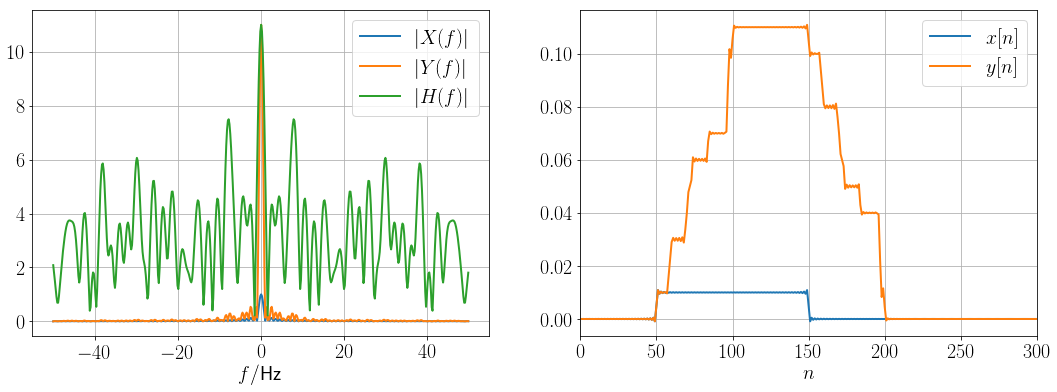

In [6]:
# plotting results
plt.subplot( 121 )
plt.plot( f, np.abs( X ), linewidth = 2.0, label='$|X(f)|$' )
plt.plot( f, np.abs( Y ), linewidth = 2.0, label='$|Y(f)|$' )
plt.plot( f, np.abs( H ), linewidth = 2.0, label='$|H(f)|$' )

plt.xlabel('$f/$Hz')
plt.grid( True )    
plt.legend( loc = 'upper right' )

plt.subplot( 122 )
plt.plot( np.real( x ), linewidth = 2.0, label='$x[n]$' )    
plt.plot( np.real( y ), linewidth = 2.0, label='$y[n]$' )

plt.xlim( (0, 300) )
plt.xlabel( '$n$' )
plt.grid( True )
plt.legend( loc = 'upper right' )